In [83]:
%matplotlib inline
import pandas as pd 
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
import warnings
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
from sklearn.ensemble import  GradientBoostingClassifier
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC, LinearSVC 
from sklearn.neural_network import MLPClassifier

#Additional imports
import graphviz
from sklearn import tree
import xgboost as xgb

from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
import json
import pickle
# brew install graphviz

In [2]:
%%javascript
    IPython.OutputArea.auto_scroll_threshold = 9999

<IPython.core.display.Javascript object>

### Read all Data
Read train data and the prediction data

In [3]:
data = pd.read_csv("~/Documents/Classes/W207/forest-cover-type-prediction/train.csv")
pd.set_option('display.max_columns',100)

### Data Split

Split the data into train , develop , predict . All EDA will be done on the train data.

In [4]:
X = np.array(data.as_matrix(columns=data.columns[1:55]))
Y = np.array(data["Cover_Type"].tolist())
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]
train_df = data.iloc[shuffle,:].iloc[:12000 , :]
print('data shape: ', X.shape)
print('label shape:', Y.shape)
test_data, test_labels = X[13000:], Y[13000:]
dev_data, dev_labels = X[12000:13000], Y[12000:13000]
train_data, train_labels = X[:12000], Y[:12000]

data shape:  (15120, 54)
label shape: (15120,)


/Users/krsrik/.venvs/opencv/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


### EDA

#### Step 1 : Describe the train data

In [5]:
display(train_df.describe())

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,12000.000000,12000.000000,12000.000000,12000.000000,12000.00000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.00000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.0,12000.000000,12000.000000,12000.000000,12000.00000,12000.000000,12000.000000,12000.000000,12000.0,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000
mean,7574.439333,2749.891333,157.462750,16.458750,226.89775,50.617000,1716.747333,212.650417,219.062667,135.295917,1522.257583,0.238833,0.034083,0.418833,0.30825,0.023167,0.040167,0.063917,0.055667,0.010750,0.043333,0.0,0.000083,0.000667,0.141250,0.02700,0.015667,0.031667,0.011250,0.0,0.007583,0.042000,0.004417,0.002833,0.008917,0.001250,0.022583,0.050917,0.016667,0.000083,0.003583,0.000917,0.000750,0.087417,0.048417,0.022167,0.044333,0.038750,0.001500,0.006583,0.000500,0.002417,0.047167,0.042667,0.031000,4.001917
std,4375.305461,417.001447,110.340475,8.450991,210.63616,61.076758,1328.938396,30.634388,22.674797,45.818156,1107.581887,0.426388,0.181451,0.493389,0.46179,0.150439,0.196358,0.244615,0.229286,0.103128,0.203615,0.0,0.009129,0.025812,0.348294,0.16209,0.124187,0.175118,0.105472,0.0,0.086755,0.200597,0.066314,0.053156,0.094010,0.035335,0.148577,0.219837,0.128024,0.009129,0.059756,0.030264,0.027377,0.282456,0.214654,0.147231,0.205843,0.193007,0.038702,0.080874,0.022356,0.049102,0.212004,0.202113,0.173325,2.002061
min,2.000000,1863.000000,0.000000,0.000000,0.00000,-146.000000,0.000000,0.000000,99.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3797.750000,2376.000000,65.000000,10.000000,67.00000,4.000000,760.000000,196.000000,207.000000,107.000000,732.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,7568.500000,2752.000000,126.000000,15.000000,180.00000,32.000000,1316.000000,220.000000,223.000000,138.000000,1265.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00

Following is what we observe:
1. All fields are continous or binary. There are no text fields 
2. Soil_Type fields are binary
3. Wilderness Area fields are binary
4. Following are the fields which are continous : 'Elevation', 'Aspect', 'Slope','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways','Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm','Horizontal_Distance_To_Fire_Points'

We create the scatter plots for the continous fields

#### Step 2 : Scatter plot for continous fields

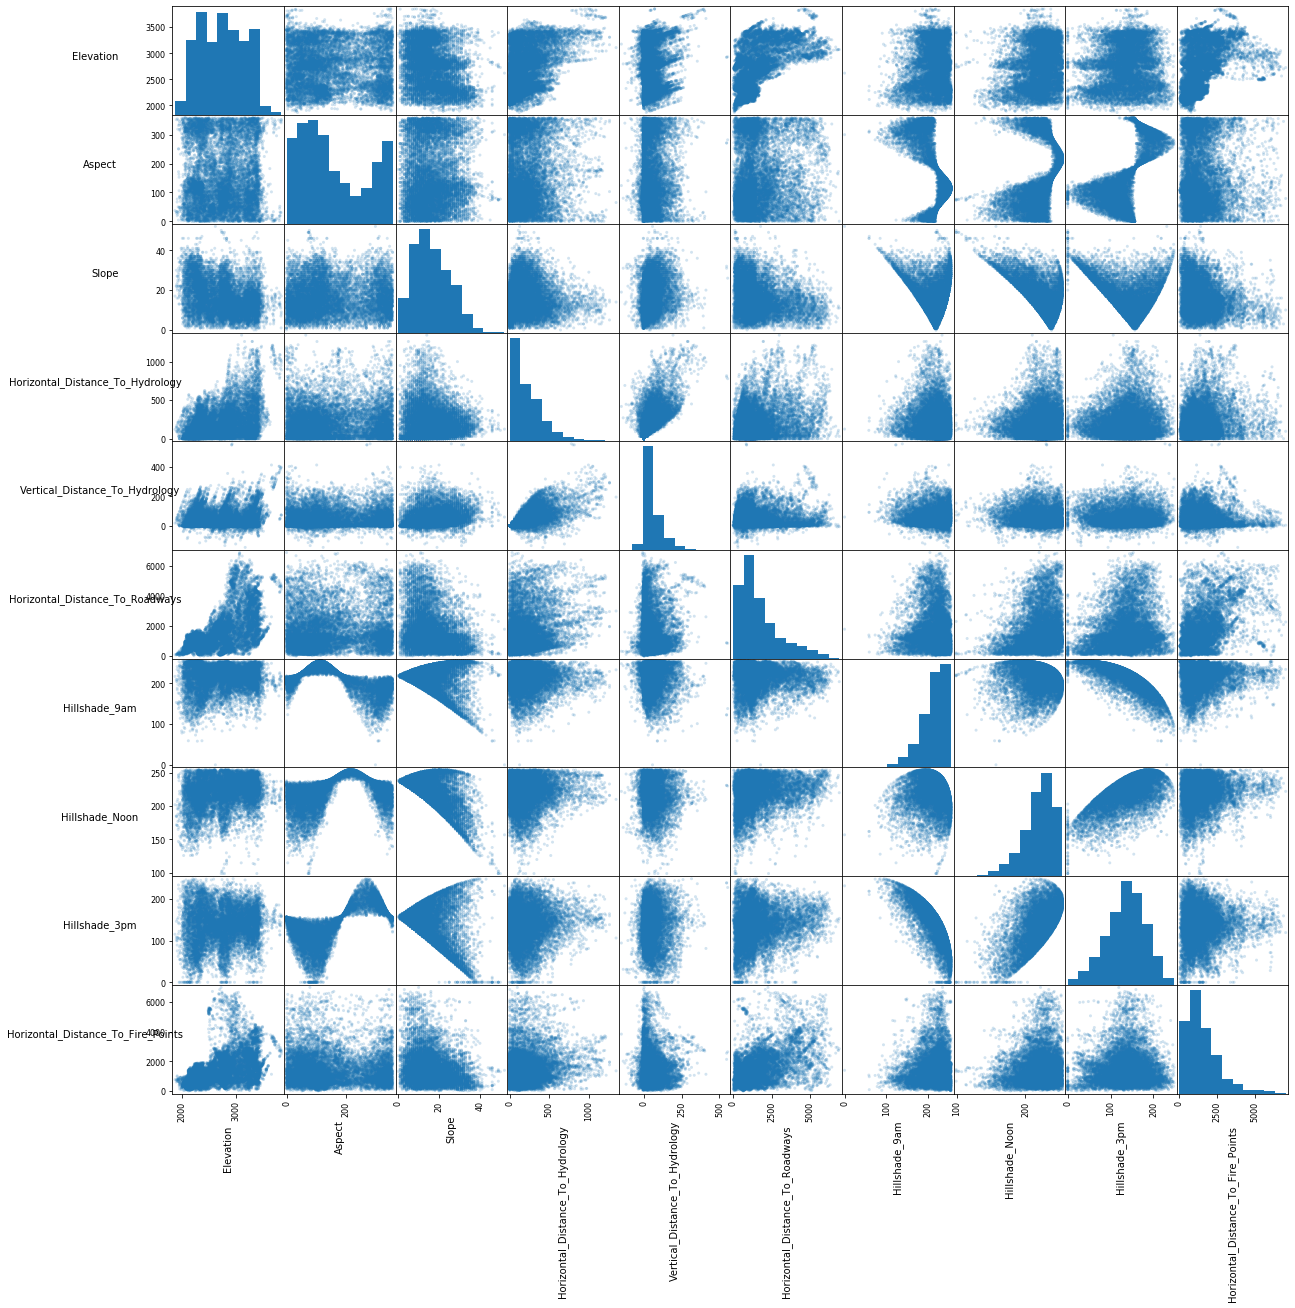

In [6]:
plot_temp = train_df[['Elevation', 'Aspect', 'Slope','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm','Horizontal_Distance_To_Fire_Points']]
axs = pd.plotting.scatter_matrix(plot_temp,alpha=0.2,figsize=(20, 20))
n = len(plot_temp.columns)
for x in range(n):
    for y in range(n):
        # to get the axis of subplots
        ax = axs[x, y]
        # to make x axis name vertical  
        ax.xaxis.label.set_rotation(90)
        # to make y axis name horizontal 
        ax.yaxis.label.set_rotation(0)
        # to make sure y axis names are outside the plot area
        ax.yaxis.labelpad = 50
plt.show()

Followin are the observations :
1. The graph shows that there is a correlation between Hillshade_3PM , Hillshade_9AM , Hillshade_Noon , although it is not linear
2. Also Hillshade_3PM , Hillshade_9AM , Hillshade_Noon seems to be correlated to Aspect , although it is not linear.
3. Also Hillshade_3PM , Hillshade_9AM , Hillshade_Noon seems to be correlated to Slope , although it is not linear.
4. Log of Horizontal_Distance_To_Hydrology , Horizontal_Distance_To_Fire_Points , Horizontal_Distance_To_Roadways

#### Step 3 : Count zero and NA values

In [7]:
def count_non_zero_for_a_column(train_df, column_name):
    count_obj = train_df.apply(lambda x: True if x[column_name] == 0 else False , axis=1)
    no_rows = len(count_obj[count_obj == True].index)
    print ( column_name , ' : ' , no_rows )
print ("\033[1m" , 'Count of zero rows by column :' , "\033[0;0m")
column_list = ['Elevation', 'Aspect', 'Slope','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm','Horizontal_Distance_To_Fire_Points']
for column_name in column_list:
    count_non_zero_for_a_column(train_df, column_name)
print ("\033[1m" , 'Count of NA rows by column :' , "\033[0;0m")    
print (train_df.count(axis = 0)   ) 

 Count of zero rows by column : 
Elevation  :  0
Aspect  :  83
Slope  :  2
Horizontal_Distance_To_Hydrology  :  1285
Vertical_Distance_To_Hydrology  :  1514
Horizontal_Distance_To_Roadways  :  2
Hillshade_9am  :  1
Hillshade_Noon  :  0
Hillshade_3pm  :  70
Horizontal_Distance_To_Fire_Points  :  2
 Count of NA rows by column : 
Id                                    12000
Elevation                             12000
Aspect                                12000
Slope                                 12000
Horizontal_Distance_To_Hydrology      12000
Vertical_Distance_To_Hydrology        12000
Horizontal_Distance_To_Roadways       12000
Hillshade_9am                         12000
Hillshade_Noon                        12000
Hillshade_3pm                         12000
Horizontal_Distance_To_Fire_Points    12000
Wilderness_Area1                      12000
Wilderness_Area2                      12000
Wilderness_Area3                      12000
Wilderness_Area4                      12000
Soil_Type1 

Following are what we observe :
1. There are no NA values in any column
2. Horizontal_Distance_To_Hydrology and Vertical_Distance_To_Hydrology are zero for more than 10% of the data points.
    

### Solution Approaches

#### Approach 1 
1. Without transformation fit Decission Tree , Random Forest , KNN , Naive Bayes , Logistic Regression , Gradient Boosting to the train data . Get the best accuracy in test data.
2. Get the most important features from Decision Tree model and fit Decission Tree , Random Forest , KNN , Naive Bayes , Logistic Regression , Gradient Boosting to the train data passing only the important feature. Get the best accuracy in test data.

#### Approach 2 
1. Tranform the train data continous features with Min Max Scaler
2. Ffit Decission Tree , Random Forest , KNN , Naive Bayes , Logistic Regression , Gradient Boosting to the train data . Get the best accuracy in test data.
3. Get the most important features from Decision Tree model and fit Decission Tree , Random Forest , KNN , Naive Bayes , Logistic Regression , Gradient Boosting to the train data passing only the important feature. Get the best accuracy in test data.

#### Approach 3 
1. Tranform the train data continous features with Robust Scaler
2. Ffit Decission Tree , Random Forest , KNN , Naive Bayes , Logistic Regression , Gradient Boosting to the train data . Get the best accuracy in test data.
3. Get the most important features from Decision Tree model and fit Decission Tree , Random Forest , KNN , Naive Bayes , Logistic Regression , Gradient Boosting to the train data passing only the important feature. Get the best accuracy in test data.

#### Approach 4 
1. Tranform the train data using PCA
2. Ffit Decission Tree , Random Forest , KNN , Naive Bayes , Logistic Regression , Gradient Boosting to the train data . Get the best accuracy in test data.
3. Get the most important features from Decision Tree model and fit Decission Tree , Random Forest , KNN , Naive Bayes , Logistic Regression , Gradient Boosting to the train data passing only the important feature. Get the best accuracy in test data.

#### Approach 5 
1. Tranform the train data continous features taking log for relevant fields
2. Ffit Decission Tree , Random Forest , KNN , Naive Bayes , Logistic Regression , Gradient Boosting to the train data . Get the best accuracy in test data.
3. Get the most important features from Decision Tree model and fit Decission Tree , Random Forest , KNN , Naive Bayes , Logistic Regression , Gradient Boosting to the train data passing only the important feature. Get the best accuracy in test data.

### Reusable Algorithm Code

In [8]:
warnings.filterwarnings(action='ignore')  

In [130]:
class MLModel():
    """
    Parent class for all ML models
    """
    def __init__(self, modelName='LogisticRegression'):
        self.modelName = modelName
        self.scaler = None
        self.pca = None
        self.npca = None
        self.scaler_type = None
        self.X_train = None
        self.X_dev = None
        self.predicted = None
        
        if modelName == 'LogisticRegression':
            self.model = LogisticRegression(penalty='l2', solver='newton-cg', tol=0.001,random_state=1,
                                            multi_class='auto', max_iter=1000, verbose=0)
        elif modelName == 'DecisionTree':
            self.model = DecisionTreeClassifier(random_state=1)
        elif modelName == 'RandomForest':
            self.model = RandomForestClassifier(random_state=1)
        elif modelName == 'GradientBoosting':
            self.model = GradientBoostingClassifier(random_state=1)
        elif modelName == 'KNearestNeighbor':
            self.model = KNeighborsClassifier()
        elif modelName == 'Xgboost':
            self.model = xgb.XGBClassifier(random_state=1)
        elif modelName == 'LinearSVM':
            self.model = LinearSVC(random_state=1, multi_class='crammer_singer')
        elif modelName == 'SVC':
            self.model = SVC(random_state=1)
        elif modelName == 'NeuralNet':
            self.model = MLPClassifier(random_state=1)
        else:
            raise Exception('Model ' + modelName + ' not implemented...')
            
    def grid_search(self, train_data, train_labels, dev_data, dev_labels, params, 
                    pca_var_threshold=None, scaler_type=None, print_out=False):
        grd_model = GridSearchCV( self.model,  param_grid = params ,return_train_score = 1, cv=3, n_jobs=-1)
        self.X_train = train_data
        self.X_dev = dev_data

        if scaler_type is not None:
            [self.X_train, self.X_dev] = self.scale_data(scaler_type ,  train_data , dev_data)
            if pca_var_threshold is not None:
                [self.X_train, self.X_dev] = self.pca_transform(self.X_train, self.X_dev, pca_var_threshold)
        else:
            if pca_var_threshold is not None:
                [self.X_train, self.X_dev] = self.pca_transform(self.X_train, self.X_dev, pca_var_threshold)

        grd_model.fit(self.X_train,train_labels)
        predicted= grd_model.predict(self.X_dev)
        
        if (print_out):  
            print ( "\033[1m" ,  self.modelName , "\033[0;0m" )
            print ("Best fit parameters :")
            print (grd_model.best_params_)
            print ("Best fit model F1 score :")
            print (metrics.f1_score(dev_labels, predicted , average='micro'))

        self.classification_report = classification_report(predicted,dev_labels )
        self.best_model = grd_model
        self.best_metrics = metrics.f1_score(dev_labels, predicted , average='micro')
        self.predicted = predicted
        self.cm = metrics.confusion_matrix(dev_labels,predicted)
        
    def scale_data(self, scaler_type ,  X_train , X_dev):
        self.scaler_type = scaler_type
        
        if scaler_type == 'MinMax' :
            scaler = MinMaxScaler(feature_range=(0, 1))
        elif scaler_type == 'Robust':
            scaler = RobustScaler()
        elif scaler_type == 'Standard':
            scaler = StandardScaler()
        else:
            print('Unrecognized scaler ' + scaler_type + ' ... reverting to MinMax')
            scaler = MinMaxScaler(feature_range=(0, 1))
            self.scaler_type = 'MinMax'
            
        scaled_X_train = scaler.fit_transform(X_train)
        scaled_X_dev = scaler.transform(X_dev)
        
        self.scaled_X_train = scaled_X_train
        self.scaled_X_dev = scaled_X_dev
        self.scaler = scaler

        return([scaled_X_train, scaled_X_dev])
    
    def pca_transform(self, X_train , X_dev, var_threshold=0.95):
        pca = PCA(n_components=X_train.shape[1])
        pca.fit(X_train)
        df_pca = pd.DataFrame()
        df_pca['NumPrinComponents'] = np.arange(start=1 , stop=X_train.shape[1])
        df_pca['ExplainedVariance'] = pd.Series(pca.explained_variance_ratio_)
        df_pca['CumExplainedVariance'] = pd.Series(np.cumsum(pca.explained_variance_ratio_))
        print(df_pca.head())
        npca = df_pca.loc[df_pca.CumExplainedVariance > var_threshold,:].NumPrinComponents.iloc[0]
        self.npca = npca
        pcaModel = PCA(n_components=npca)
        X_train_pca = pcaModel.fit_transform(X_train)
        X_dev_pca = pcaModel.transform(X_dev)
        return([X_train_pca, X_dev_pca])
    
    def drawConfusionMatrix(self):
        plt.figure(figsize=(10,10))
        plt.imshow(self.cm, interpolation='nearest', cmap=plt.cm.Wistia)
        classNames = [str(i+1) for i in range(self.cm.shape[0])]
        plt.title('Confusion Matrix For ' + self.modelName, fontsize = 18)
        plt.ylabel('True label', fontsize = 14)
        plt.xlabel('Predicted label', fontsize = 14)
        tick_marks = np.arange(len(classNames))
        plt.xticks(tick_marks, classNames, rotation=0, fontsize=14)
        plt.yticks(tick_marks, classNames, fontsize=14)
        for i in range(len(classNames)):
            for j in range(len(classNames)):
                plt.text(j,i, str(self.cm[i][j]), size='large')
        plt.show()


In [131]:
scaler_experiments = [None, 'MinMax', 'Robust']
pca_experiments = [None, 0.95]
model_experiments = [
    {'modelName':'KNearestNeighbor','params':{ 'n_neighbors' : [3, 5, 7, 9] }},
    {'modelName':'LogisticRegression','params':{ 'C' : [ 0.1, 1.0, 100.0]}},
    {'modelName':'SVC','params':{ 'C' : [10.0]}},
    {'modelName':'LinearSVM','params':{ 'C' : [10.0]}},
    {'modelName':'DecisionTree','params':{ 'max_depth' : [5, 15, 30, 50] }},
    {'modelName':'RandomForest','params':{ 'n_estimators' : [ 20 , 40 ,100 , 200 ]  }},
    {'modelName':'GradientBoosting','params':{ 'n_estimators' : [ 20 , 40 ,100 ,200]}},
    {'modelName':'Xgboost','params': {'objective':['multi:softmax'],'max_depth': [3,5,7],'subsample': [0.8],
          'n_estimators': [20, 40, 100, 200]}},
    {'modelName':'NeuralNet','params':{ 'hidden_layer_sizes' : [(50,),(50,20),(100,),(100, 20)]}}    
]

In [41]:
model_list = []
ctr=1
results_df = pd.DataFrame()
for scaler_type in scaler_experiments:
    for pca_var in pca_experiments:
        for model_type in model_experiments:
            print('-------------------------------------')
            print('Model #' + str(ctr))
            print('Scaler: ' + str(scaler_type))
            print('PCA Variance Threshold: ' + str(pca_var))  
            print('Model: ' + model_type['modelName'])
            print('Parameters: ' + str(json.dumps(model_type['params'])))
            
            model = MLModel(modelName=model_type['modelName'])
            model.grid_search(train_data, train_labels, dev_data, dev_labels, model_type['params'], 
                       pca_var_threshold=pca_var, scaler_type=scaler_type, print_out=False)
            
            print('PCA Components: ' + str(model.npca))
            print('Best Parameters: ' + str(json.dumps(model.best_model.best_params_)))
            print('Best F1 Score: ' + str(model.best_metrics))
            print('-------------------------------------')
            model_list.append(model)
            
            results_df = results_df.append(pd.DataFrame({'Model#':[ctr],'ModelName':[model.modelName],'Scaler':[str(scaler_type)],
                                            'PCA: VarianceThreshold':[str(pca_var)], 
                                            'PCA: Number of Components':[str(model.npca)],
                                            'Best Parameters':[str(json.dumps(model.best_model.best_params_))],
                                            'F1 Score':[str(model.best_metrics)]}))

            # Save to file in the current working directory
            pkl_filename = 'Models/' + model.modelName + '-' + str(scaler_type) + '-' + str(pca_var) + '.pkl'
            with open(pkl_filename, 'wb') as file:
                pickle.dump(model, file)
            ctr +=1

-------------------------------------
Model #1
Scaler: None
PCA Variance Threshold: None
Model: KNearestNeighbor
Parameters: {"n_neighbors": [3, 5, 7, 9]}
PCA Components: None
Best Parameters: {"n_neighbors": 3}
Best F1 Score: 0.828
-------------------------------------
-------------------------------------
Model #2
Scaler: None
PCA Variance Threshold: None
Model: LogisticRegression
Parameters: {"C": [0.1, 1.0, 100.0]}
PCA Components: None
Best Parameters: {"C": 1.0}
Best F1 Score: 0.679
-------------------------------------
-------------------------------------
Model #3
Scaler: None
PCA Variance Threshold: None
Model: SVC
Parameters: {"C": [10.0]}
PCA Components: None
Best Parameters: {"C": 10.0}
Best F1 Score: 0.148
-------------------------------------
-------------------------------------
Model #4
Scaler: None
PCA Variance Threshold: None
Model: LinearSVM
Parameters: {"C": [10.0]}
PCA Components: None
Best Parameters: {"C": 10.0}
Best F1 Score: 0.447
-------------------------------

PCA Components: 3
Best Parameters: {"hidden_layer_sizes": [100, 20]}
Best F1 Score: 0.596
-------------------------------------
-------------------------------------
Model #19
Scaler: MinMax
PCA Variance Threshold: None
Model: KNearestNeighbor
Parameters: {"n_neighbors": [3, 5, 7, 9]}
PCA Components: None
Best Parameters: {"n_neighbors": 3}
Best F1 Score: 0.7810000000000001
-------------------------------------
-------------------------------------
Model #20
Scaler: MinMax
PCA Variance Threshold: None
Model: LogisticRegression
Parameters: {"C": [0.1, 1.0, 100.0]}
PCA Components: None
Best Parameters: {"C": 100.0}
Best F1 Score: 0.682
-------------------------------------
-------------------------------------
Model #21
Scaler: MinMax
PCA Variance Threshold: None
Model: SVC
Parameters: {"C": [10.0]}
PCA Components: None
Best Parameters: {"C": 10.0}
Best F1 Score: 0.668
-------------------------------------
-------------------------------------
Model #22
Scaler: MinMax
PCA Variance Thresh

PCA Components: 27
Best Parameters: {"hidden_layer_sizes": [100, 20]}
Best F1 Score: 0.786
-------------------------------------
-------------------------------------
Model #37
Scaler: Robust
PCA Variance Threshold: None
Model: KNearestNeighbor
Parameters: {"n_neighbors": [3, 5, 7, 9]}
PCA Components: None
Best Parameters: {"n_neighbors": 3}
Best F1 Score: 0.776
-------------------------------------
-------------------------------------
Model #38
Scaler: Robust
PCA Variance Threshold: None
Model: LogisticRegression
Parameters: {"C": [0.1, 1.0, 100.0]}
PCA Components: None
Best Parameters: {"C": 100.0}
Best F1 Score: 0.683
-------------------------------------
-------------------------------------
Model #39
Scaler: Robust
PCA Variance Threshold: None
Model: SVC
Parameters: {"C": [10.0]}
PCA Components: None
Best Parameters: {"C": 10.0}
Best F1 Score: 0.738
-------------------------------------
-------------------------------------
Model #40
Scaler: Robust
PCA Variance Threshold: None
Mo

PCA Components: 20
Best Parameters: {"hidden_layer_sizes": [100, 20]}
Best F1 Score: 0.823
-------------------------------------


In [141]:
# The best scoring models
results_df.sort_values(by='F1 Score', ascending=False).head(5)

,Model#,ModelName,Scaler,PCA: VarianceThreshold,PCA: Number of Components,Best Parameters,F1 Score
0,8,Xgboost,None,None,None,"{""max_depth"": 7, ""n_estimators"": 200, ""objecti...",0.863
0,26,Xgboost,MinMax,None,None,"{""max_depth"": 7, ""n_estimators"": 200, ""objecti...",0.8619999999999999
0,44,Xgboost,Robust,None,None,"{""max_depth"": 7, ""n_estimators"": 200, ""objecti...",0.859
0,42,RandomForest,Robust,None,None,"{""n_estimators"": 200}",0.859
0,24,RandomForest,MinMax,None,None,"{""n_estimators"": 200}",0.858


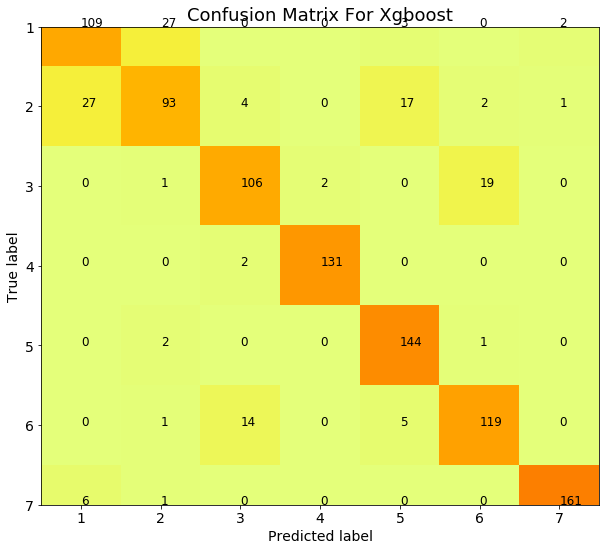

In [137]:
# Draw the confusion matrix for best model
best_model_id = results_df.sort_values(by='F1 Score', ascending=False)['Model#'].values[0]
model_list[best_model_id-1].drawConfusionMatrix()

In [138]:
#The worst performing models
results_df.sort_values(by='F1 Score').head(5)

,Model#,ModelName,Scaler,PCA: VarianceThreshold,PCA: Number of Components,Best Parameters,F1 Score
0,12,SVC,None,0.95,3,"{""C"": 10.0}",0.144
0,3,SVC,None,None,None,"{""C"": 10.0}",0.148
0,13,LinearSVM,None,0.95,3,"{""C"": 10.0}",0.174
0,4,LinearSVM,None,None,None,"{""C"": 10.0}",0.447
0,11,LogisticRegression,None,0.95,3,"{""C"": 0.1}",0.541


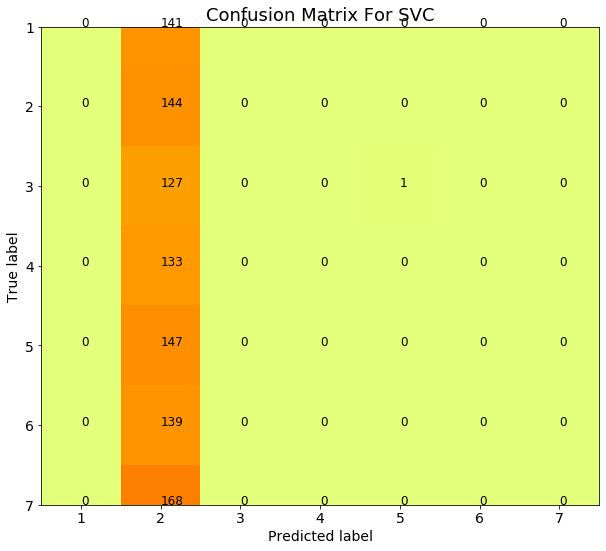

In [139]:
# Draw the confusion matrix for best model
worst_model_id = results_df.sort_values(by='F1 Score')['Model#'].values[0]
model_list[worst_model_id-1].drawConfusionMatrix()

The SVM models seem to perform poorly when the data is not scaled. This is observed from the table below.

In [140]:
#SVM models
results_df.loc[results_df.ModelName.str.contains('SV'),:]

,Model#,ModelName,Scaler,PCA: VarianceThreshold,PCA: Number of Components,Best Parameters,F1 Score
0,3,SVC,None,None,None,"{""C"": 10.0}",0.148
0,4,LinearSVM,None,None,None,"{""C"": 10.0}",0.447
0,12,SVC,None,0.95,3,"{""C"": 10.0}",0.144
0,13,LinearSVM,None,0.95,3,"{""C"": 10.0}",0.174
0,21,SVC,MinMax,None,None,"{""C"": 10.0}",0.668
0,22,LinearSVM,MinMax,None,None,"{""C"": 10.0}",0.688
0,30,SVC,MinMax,0.95,27,"{""C"": 10.0}",0.653
0,31,LinearSVM,MinMax,0.95,27,"{""C"": 10.0}",0.654
0,39,SVC,Robust,None,None,"{""C"": 10.0}",0.738
0,40,LinearSVM,Robust,None,None,"{""C"": 10.0}",0.688


### Best Model: Hyperparameter Tuning

In [132]:
scaler_type ='Robust'
pca_var = None

max_features = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
n_estimators = [ 50, 100, 150, 200 ]
num_features = []
num_trees = []
f1_scores = []
models = []
model_no = []
ctr = 1
for nfeatures in max_features:
    for ntrees in n_estimators:
        model_experiments = [

            {'modelName':'RandomForest','params':{ 'n_estimators' : [ ntrees ]  , 'max_features':[nfeatures]}}
        ]
        for model_type in model_experiments:
            print('-------------------------------------')
            print('Scaler: ' + str(scaler_type))
            print('PCA Variance Threshold: ' + str(pca_var))  
            print('Model: ' + model_type['modelName'])
            print('Parameters: ' + str(json.dumps(model_type['params'])))

            model = MLModel(modelName=model_type['modelName'])
            model.grid_search(train_data, train_labels, dev_data, dev_labels, model_type['params'], 
                       pca_var_threshold=pca_var, scaler_type=scaler_type, print_out=False)

            print('PCA Components: ' + str(model.npca))
            print('Best Parameters: ' + str(json.dumps(model.best_model.best_params_)))
            print('Best F1 Score: ' + str(model.best_metrics))
            print('-------------------------------------')
            models.append(model)
            num_features.append(nfeatures)
            num_trees.append(ntrees)
            f1_scores.append(model.best_metrics)
            model_no.append(ctr)
            ctr += 1
best_model_df = pd.DataFrame({'ModelNo':model_no,'n_estimators':num_trees,'n_features':num_features,'f1_scores':f1_scores})         

-------------------------------------
Scaler: Robust
PCA Variance Threshold: None
Model: RandomForest
Parameters: {"n_estimators": [50], "max_features": [5]}
PCA Components: None
Best Parameters: {"max_features": 5, "n_estimators": 50}
Best F1 Score: 0.853
-------------------------------------
-------------------------------------
Scaler: Robust
PCA Variance Threshold: None
Model: RandomForest
Parameters: {"n_estimators": [100], "max_features": [5]}
PCA Components: None
Best Parameters: {"max_features": 5, "n_estimators": 100}
Best F1 Score: 0.857
-------------------------------------
-------------------------------------
Scaler: Robust
PCA Variance Threshold: None
Model: RandomForest
Parameters: {"n_estimators": [150], "max_features": [5]}
PCA Components: None
Best Parameters: {"max_features": 5, "n_estimators": 150}
Best F1 Score: 0.858
-------------------------------------
-------------------------------------
Scaler: Robust
PCA Variance Threshold: None
Model: RandomForest
Parameter

PCA Components: None
Best Parameters: {"max_features": 35, "n_estimators": 200}
Best F1 Score: 0.866
-------------------------------------
-------------------------------------
Scaler: Robust
PCA Variance Threshold: None
Model: RandomForest
Parameters: {"n_estimators": [50], "max_features": [40]}
PCA Components: None
Best Parameters: {"max_features": 40, "n_estimators": 50}
Best F1 Score: 0.867
-------------------------------------
-------------------------------------
Scaler: Robust
PCA Variance Threshold: None
Model: RandomForest
Parameters: {"n_estimators": [100], "max_features": [40]}
PCA Components: None
Best Parameters: {"max_features": 40, "n_estimators": 100}
Best F1 Score: 0.864
-------------------------------------
-------------------------------------
Scaler: Robust
PCA Variance Threshold: None
Model: RandomForest
Parameters: {"n_estimators": [150], "max_features": [40]}
PCA Components: None
Best Parameters: {"max_features": 40, "n_estimators": 150}
Best F1 Score: 0.868
----

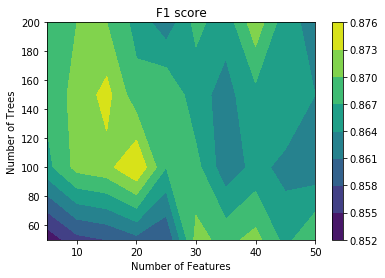

In [142]:
plt.contourf(max_features,n_estimators, np.array(f1_scores).reshape((len(n_estimators),len(max_features))))
plt.title('F1 score')
plt.xlabel('Number of Features')
plt.ylabel('Number of Trees')
plt.colorbar()
plt.show()

In [143]:
feature_importances = pd.DataFrame({'Features':data.columns[1:55],
                                    'Importance':best_model.best_model.best_estimator_.feature_importances_})
feature_importances.sort_values(by='Importance', ascending=False).head(10)

,Features,Importance
0,Elevation,0.303139
5,Horizontal_Distance_To_Roadways,0.089480
9,Horizontal_Distance_To_Fire_Points,0.072979
3,Horizontal_Distance_To_Hydrology,0.065262
4,Vertical_Distance_To_Hydrology,0.049232
6,Hillshade_9am,0.047468
13,Wilderness_Area4,0.045562
1,Aspect,0.044056
7,Hillshade_Noon,0.038665
8,Hillshade_3pm,0.037578


In [151]:
scaler_type ='Robust'
pca = None
best_model_id = best_model_df.sort_values(by='f1_scores', ascending=False)['ModelNo'].values[0]
res_model = models[best_model_id-1]
if scaler_type is not None:
    scaled_X_test = res_model.scaler.transform(test_data)
    if model.pca is not None:
        scaled_pca_X_test = res_model.pca.transform(scaled_X_test)
        predictions = res_model.predict(scaled_pca_X_test)
    else:
        predictions = res_model.best_model.best_estimator_.predict(scaled_X_test)
else:
    predictions = res_model.best_model.best_estimator_(X_test)
    
print(classification_report(predictions,test_labels ))

print(metrics.f1_score(test_labels, predictions , average='micro'))
print(metrics.confusion_matrix(test_labels,predictions))

              precision    recall  f1-score   support

           1       0.77      0.78      0.77       301
           2       0.64      0.77      0.70       244
           3       0.84      0.89      0.87       314
           4       0.97      0.95      0.96       326
           5       0.97      0.89      0.92       322
           6       0.90      0.84      0.87       323
           7       0.97      0.92      0.95       290

    accuracy                           0.87      2120
   macro avg       0.87      0.86      0.86      2120
weighted avg       0.87      0.87      0.87      2120

0.8660377358490566
[[234  45   1   0   6   1  16]
 [ 61 189   8   0  24   5   7]
 [  0   1 281   9   4  38   0]
 [  0   0   4 310   0   7   0]
 [  0   5   3   0 285   2   0]
 [  0   3  17   7   3 270   0]
 [  6   1   0   0   0   0 267]]
